In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


In [2]:
df = pd.read_excel('../data/Crop_Yield_Prediction.xlsx')
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [3]:
df.describe()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


In [4]:
df.isnull().sum()

Rain Fall (mm)    10
Fertilizer        10
Temperatue         9
Nitrogen (N)      10
Phosphorus (P)    10
Potassium (K)     10
Yeild (Q/acre)    10
dtype: int64

In [5]:
df = df.dropna()

In [7]:
df.shape

(99, 7)

In [8]:
df.duplicated().sum()

4

In [9]:
df.drop_duplicates()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
93,475.0,65.0,38,60.0,20.0,16.0,8.0
94,1250.0,77.0,28,78.0,23.0,20.0,9.0
95,425.0,60.0,39,65.0,19.0,17.0,6.5
96,1220.0,79.0,28,77.0,23.0,21.0,10.5


In [10]:
df['Temperatue'] = df['Temperatue'].astype(int)

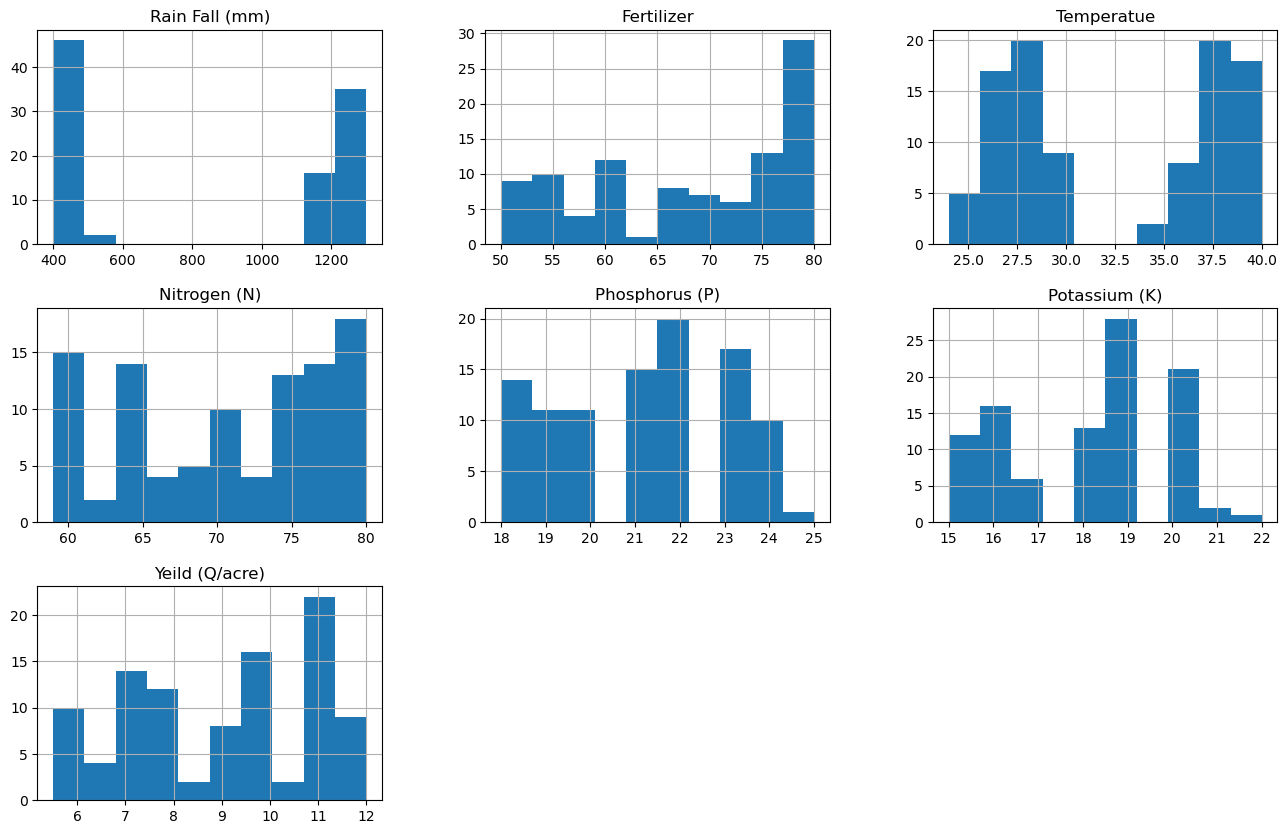

In [11]:
df.hist(figsize=(16,10))
plt.savefig("yr_featuredistribution.png", dpi=300, bbox_inches='tight')
plt.show()

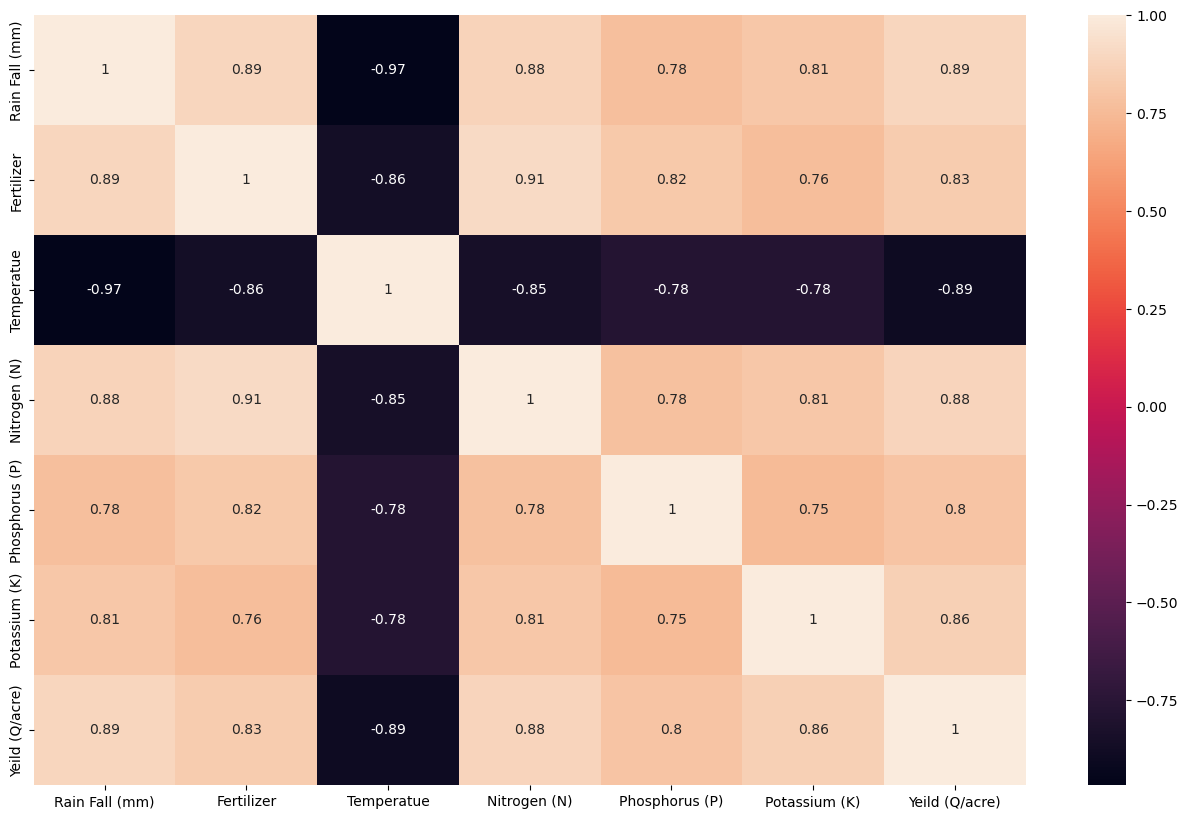

In [12]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot = True)
plt.savefig("yp_correlation_heatmap.png", dpi=300, bbox_inches='tight')

In [13]:
x = df.drop('Yeild (Q/acre)',axis = 1)
y = df['Yeild (Q/acre)']

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state =42)

In [15]:
scaler = MinMaxScaler()
xtrain_scaled = pd.DataFrame(scaler.fit_transform(xtrain),columns = xtrain.columns)
xtest_scaled = pd.DataFrame(scaler.transform(xtest), columns = xtest.columns)

In [16]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "SVR": SVR(),
    "KNN Regressor": KNeighborsRegressor(),
    
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(xtrain_scaled, ytrain)
    y_pred = model.predict(xtest_scaled)

    mse = mean_squared_error(ytest, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(ytest, y_pred)

    results.append([name, mse, rmse, r2])

# Create and display results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MSE", "RMSE", "R² Score"])
print(results_df)


               Model       MSE      RMSE  R² Score
0  Linear Regression  0.439895  0.663246  0.906043
1      Decision Tree  0.962500  0.981071  0.794420
2      Random Forest  0.447225  0.668749  0.904477
3            XGBoost  0.666077  0.816135  0.857733
4                SVR  0.540652  0.735290  0.884522
5      KNN Regressor  0.336500  0.580086  0.928127


In [17]:
import pickle

best_model = KNeighborsRegressor()
best_model.fit(xtrain_scaled, ytrain)

# Save the trained model
with open("../models/yield_prediction_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save the scaler
with open("../models/yield_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Best model and scaler saved successfully.")


Best model and scaler saved successfully.
